In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.neural_network import MLPClassifier

from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
!unzip OnlineRetail.csv.zip

unzip:  cannot find or open OnlineRetail.csv.zip, OnlineRetail.csv.zip.zip or OnlineRetail.csv.zip.ZIP.


In [3]:
dataset = pd.read_csv('OnlineRetail.csv',header= 0,encoding= 'unicode_escape')

In [4]:
dataset.shape

(541909, 8)

In [5]:
# the dimensions of the dataframe

print(f'\ndata contains {dataset.shape[0]} samples and {dataset.shape[1]} variables')


data contains 541909 samples and 8 variables


In [6]:
# info on data types & null count

# no null values seem to exist.

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
# statistical info for every feature

dataset.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
import seaborn as sns 

In [9]:
dataset.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [10]:
dataset['Country'].value_counts(normalize=True)

United Kingdom          0.914320
Germany                 0.017521
France                  0.015790
EIRE                    0.015124
Spain                   0.004674
Netherlands             0.004375
Belgium                 0.003818
Switzerland             0.003694
Portugal                0.002803
Australia               0.002323
Norway                  0.002004
Italy                   0.001482
Channel Islands         0.001399
Finland                 0.001283
Cyprus                  0.001148
Sweden                  0.000853
Unspecified             0.000823
Austria                 0.000740
Denmark                 0.000718
Japan                   0.000661
Poland                  0.000629
Israel                  0.000548
USA                     0.000537
Hong Kong               0.000531
Singapore               0.000423
Iceland                 0.000336
Canada                  0.000279
Greece                  0.000269
Malta                   0.000234
United Arab Emirates    0.000125
European C

In [11]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = dataset[dataset.duplicated()]
print("Total Duplicate Rows except first occurrence based on all columns are :")
duplicateRowsDF.shape

Total Duplicate Rows except first occurrence based on all columns are :


(5268, 8)

In [12]:
#remove duplicate rows in training dataset
dataset.drop_duplicates(keep='first',inplace=True)

In [13]:
null_values_per_variable = 100 * (dataset.isnull().sum()/dataset.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending=False)

CustomerID     25.2
Description     0.3
Country         0.0
UnitPrice       0.0
InvoiceDate     0.0
Quantity        0.0
StockCode       0.0
InvoiceNo       0.0
dtype: float64

In [14]:
dataset.shape

(536641, 8)

In [15]:
# Droping rows having missing values

dataset = dataset.dropna()
dataset.shape

(401604, 8)

In [17]:
# Changing the datatype of Customer Id as per Business understanding

dataset['CustomerID'] = dataset['CustomerID'].astype(str)

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  object 
 7   Country      401604 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 27.6+ MB



We are going to analysis the Customers based on below 3 factors:

    R (Recency): Number of days since last purchase
    F (Frequency): Number of tracsactions
    M (Monetary): Total amount of transactions (revenue contributed)



In [19]:
dataset.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [20]:
# New Attribute : Monetary

dataset['Amount'] = dataset['Quantity']*dataset['UnitPrice']


In [21]:
dataset.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.3


In [22]:
rfm_m = dataset.groupby('CustomerID')['Amount'].sum()


In [23]:
rfm_m

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
            ...   
18280.0     180.60
18281.0      80.82
18282.0     176.60
18283.0    2045.53
18287.0    1837.28
Name: Amount, Length: 4372, dtype: float64

In [24]:
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [25]:
# New Attribute : Frequency

rfm_f = dataset.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [26]:
# Merging the two dfs

rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [29]:
# New Attribute : Recency

# Convert to datetime to proper datatype

dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [30]:
dataset.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [32]:
# Compute the maximum date to know the last transaction date

max_date = max(dataset['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [35]:
# Compute the difference between max date and transaction date

dataset['Diff'] = max_date - dataset['InvoiceDate']
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [37]:
# Compute last transaction date to get the recency of customers

rfm_p = dataset.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [38]:
# Extract number of days only

rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [39]:
# Merge tha dataframes to get the final RFM dataframe

rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


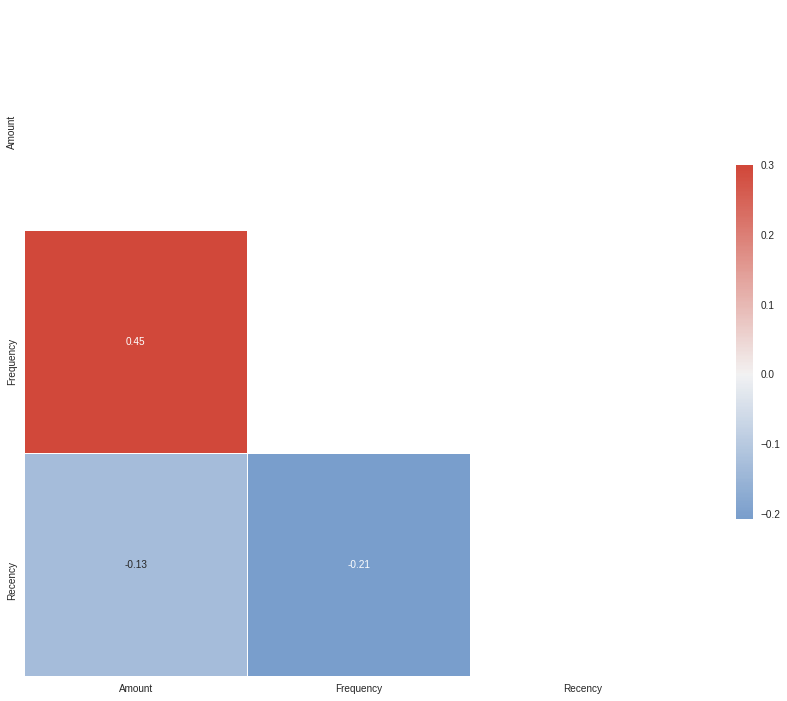

In [41]:
corr = rfm.corr()
 
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
 
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15,13))
 
# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 15, as_cmap=True)
 
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

In [45]:
new_rfm=rfm.drop(columns='CustomerID')

In [46]:
new_rfm

,Amount,Frequency,Recency
0,0.00,2,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309
...,...,...,...
4367,180.60,10,277
4368,80.82,7,180
4369,176.60,13,7
4370,2045.53,721,3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


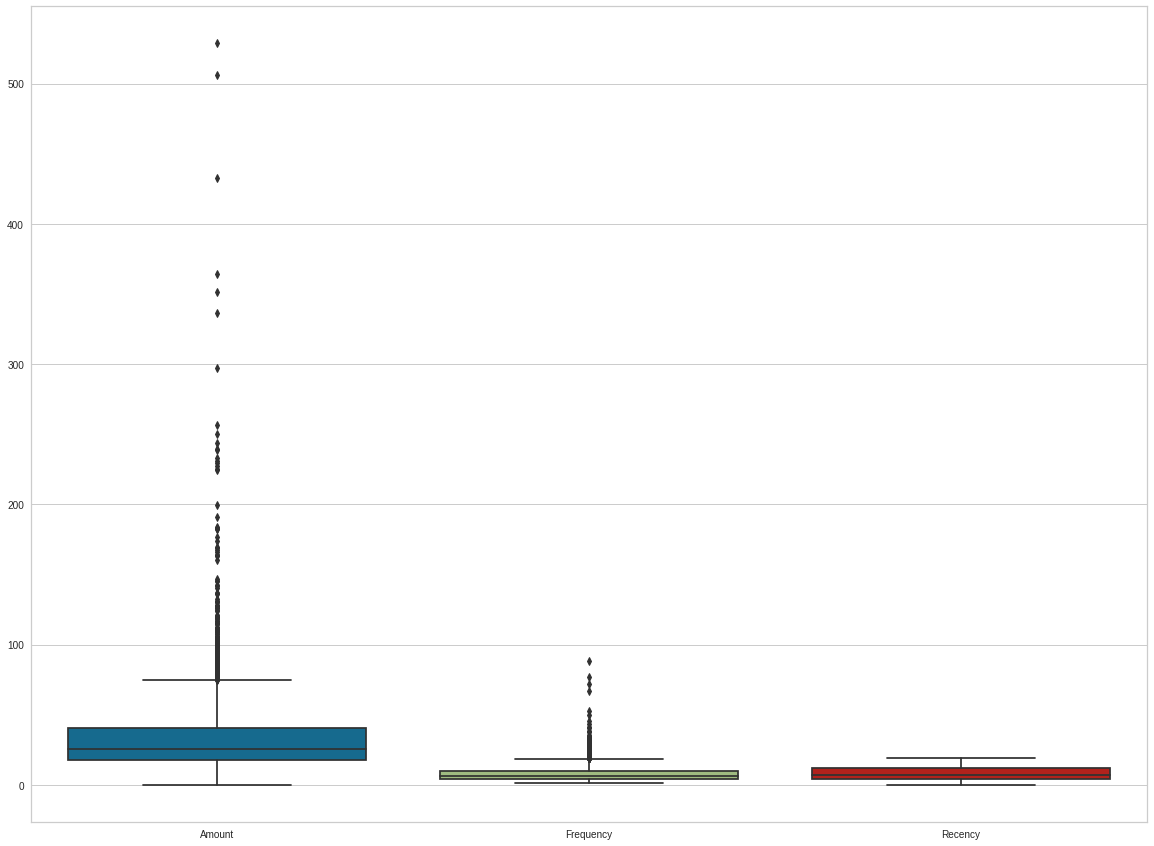

In [47]:
# we use sqrt() to see more clearly despite the outliers

plt.figure(figsize=(20,15))
sns.boxplot(data=np.sqrt(new_rfm))

In [49]:
# removing outliers
def detect_outliers(new_rfm,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(new_rfm[c],25)
        # 3rd quartile
        Q3 = np.percentile(new_rfm[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = new_rfm[(new_rfm[c] < Q1 - outlier_step) | (new_rfm[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [50]:
from collections import Counter
new_rfm.loc[detect_outliers(new_rfm,["Amount","Frequency","Recency"])]

,Amount,Frequency,Recency


In [51]:
# Removing (statistical) outliers for Amount
Q1 = new_rfm.Amount.quantile(0.05)
Q3 = new_rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
new_rfm = new_rfm[(new_rfm.Amount >= Q1 - 1.5*IQR) & (new_rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = new_rfm.Recency.quantile(0.05)
Q3 = new_rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
new_rfm = new_rfm[(new_rfm.Recency >= Q1 - 1.5*IQR) & (new_rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = new_rfm.Frequency.quantile(0.05)
Q3 = new_rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
new_rfm = new_rfm[(new_rfm.Frequency >= Q1 - 1.5*IQR) & (new_rfm.Frequency <= Q3 + 1.5*IQR)]

In [52]:
new_rfm

,Amount,Frequency,Recency
0,0.00,2,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309
...,...,...,...
4367,180.60,10,277
4368,80.82,7,180
4369,176.60,13,7
4370,2045.53,721,3


In [53]:




# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(new_rfm)
rfm_df_scaled.shape



(4295, 3)

In [54]:
rfm_df_scaled

array([[-0.72254177, -0.7508303 ,  2.30216587],
       [ 1.7352321 ,  1.05711173, -0.90615021],
       [ 0.30233283, -0.45955075, -0.18328887],
       ...,
       [-0.62183577, -0.64034496, -0.84673695],
       [ 0.44391999,  6.4708937 , -0.88634579],
       [ 0.3251656 , -0.06782998, -0.5001596 ]])

In [55]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.722542,-0.750830,2.302166
1,1.735232,1.057112,-0.906150
2,0.302333,-0.459551,-0.183289
3,0.279700,-0.037698,-0.737813
4,-0.531850,-0.600168,2.143731


model1


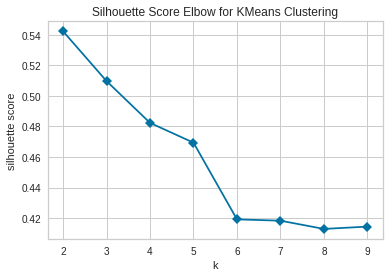

model2


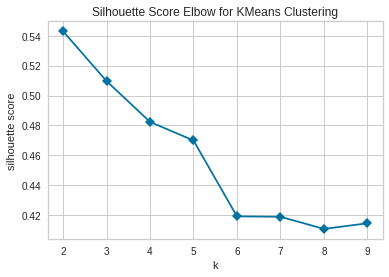

In [56]:
# 1. How many number of clusters? n_clusters?

# Since true labels are not known..we will Silhouette Coefficient (Clustering performance evaluation)
# knee Elbow graph method

#Import the KElbowVisualizer method
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model1 = KMeans(random_state=0,n_jobs=-1,)
model2 = KMeans(random_state=10, n_jobs=-1, max_iter=500, n_init=20,)

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer1 = KElbowVisualizer(model1, k=(2,10), metric='silhouette', timings=False)
visualizer2 = KElbowVisualizer(model2, k=(2,10), metric='silhouette', timings=False)
# Fit the data and visualize
print('model1')
visualizer1.fit(rfm_df_scaled)    
visualizer1.poof()
plt.show()

print('model2')
visualizer2.fit(rfm_df_scaled)    
visualizer2.poof()
plt.show()

In [57]:
from sklearn.metrics import silhouette_score

list1= [2,3,4,5,6,7,8,9]  # always start number from 2.

for n_clusters in list1:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0,n_jobs=-1)
    cluster_labels1 = clusterer1.fit_predict(rfm_df_scaled)
    sil_score1= silhouette_score(rfm_df_scaled, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.5422725903008052
For n_clusters = 3 The average silhouette_score is : 0.5096914125042423
For n_clusters = 4 The average silhouette_score is : 0.48234533133685875
For n_clusters = 5 The average silhouette_score is : 0.4694033425099701
For n_clusters = 6 The average silhouette_score is : 0.4192209082451334
For n_clusters = 7 The average silhouette_score is : 0.4183677725579155
For n_clusters = 8 The average silhouette_score is : 0.41298625861009525
For n_clusters = 9 The average silhouette_score is : 0.4145021453537508


In [59]:
# we have found good number of cluster = 6
# model building using cluster numbers = 6

model1 = KMeans(n_clusters=3, random_state=0,n_jobs=-1)
y_predict1 = model1.fit_predict(rfm_df_scaled)
y_predict1.shape

(4295,)

In [60]:
y_predict1

array([1, 0, 2, ..., 2, 0, 2], dtype=int32)

In [61]:
model1.labels_

array([1, 0, 2, ..., 2, 0, 2], dtype=int32)

In [62]:
model1.cluster_centers_

array([[ 2.07228008,  2.09500437, -0.70005301],
       [-0.50178435, -0.51812266,  1.54262556],
       [-0.18178446, -0.17953726, -0.47596105]])

In [63]:
model1.inertia_

4423.116466523651

In [64]:
model1.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'n_jobs': -1,
 'precompute_distances': 'auto',
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

In [65]:
# Creating dataframe of cluster lables..

model1_cluster = pd.DataFrame(model1.labels_.copy(), columns=['Kmeans_Clustering'])

In [66]:
model1_cluster

,Kmeans_Clustering
0,1
1,0
2,2
3,2
4,1
...,...
4290,1
4291,1
4292,2
4293,0


In [67]:
# Concating model1_Cluster df with main dataset copy

Kmeans_df = pd.concat([dataset.copy(), model1_cluster], axis=1)
Kmeans_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff,Kmeans_Clustering
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00,1.0
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00,0.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00,2.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00,2.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00,1.0


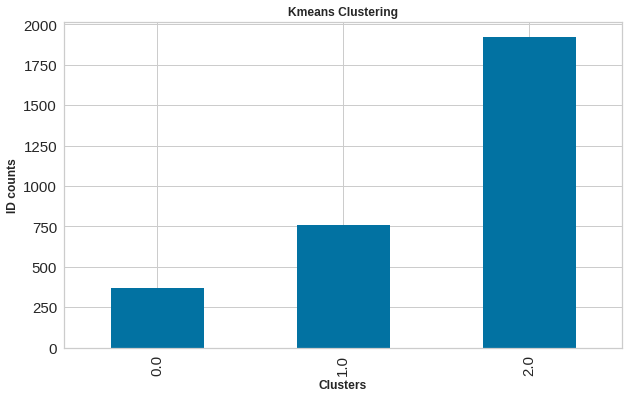

In [68]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
Kmeans_df.groupby(['Kmeans_Clustering']).count()['CustomerID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

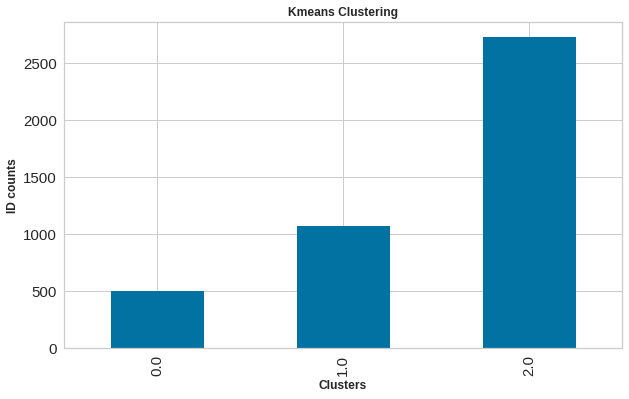

In [69]:
# Concating model1_Cluster df with main dataset copy

Kmeans_df = pd.concat([rfm.copy(), model1_cluster], axis=1)
Kmeans_df.head()

# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
Kmeans_df.groupby(['Kmeans_Clustering']).count()['CustomerID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [70]:
Kmeans_df.head()

,CustomerID,Amount,Frequency,Recency,Kmeans_Clustering
0,12346.0,0.00,2,325,1.0
1,12347.0,4310.00,182,1,0.0
2,12348.0,1797.24,31,74,2.0
3,12349.0,1757.55,73,18,2.0
4,12350.0,334.40,17,309,1.0
